# Reconstrução de imagens de tomografia

In [1]:
from IPython.display import Image

Tubo de raio X e detector em rotação
Raios X propagam-se através de uma secção do paciente.

Medimos a intensidade do feixe de saída integrada ao longo de uma linha entre a fonte de raios X e o detector:

$I_d = I_0 \exp \left[ -\int_0^d \mu(s;E)ds\right]$ (lei de de Beer) onde $\mu$ é o coeficiente de atenuação linear como função da posição e da energia efectiva $E$

Medida básica da TC: integral de linha do coeficiente de atenuação linear

## Tomografia por emissão de positrões (PET)
Emissor tipo Glucose ${}^{18}FDG$ (emissor de partículas $\beta^+$ concentra-se nas zonas metabolicamente activas.
Estamos interessados na distribuição da radioactividade dentro do corpo $e^+e^-\rightarrow 2\gamma$ (em direções opostas, $511$ keV cada um)

Detecta a coincidência de 2 fotões gama: dois detectores disparam ao mesmo tempo. Desenha-se uma linha a que se chama Linha de Resposta (LOR)- Mede-se a actividade integrada da LOR.

## Tomografia computadorizada por emissão de fotão único

Usa-se um nucleótido  emissor de raios $\gamma \rightarrow$ não há LOR
Uma câmara com colimadores que leva â reconstrução de linhas perpendiculares ao detector.

Semelhante ao PET (imagens morfológicas), mas mais simples e mais barato. No entanto a resolução espacial e a sensibildade são piores.

 * Tomografia de transmissão (CT):
Uma fonte de radiação X ou de um nucleótido de longa vida roda em torno do corpo. A quantidade a ser reconstruída é o coeficiente de atenuação linear de fotões do corpo
 * Tomografia de Emissão (PET & SPECT):
Uma fonte de radiação dentro do paciente: nucleótido emissor de $\gamma$ ou $e^+$
A quantidade a ser reconstruída é a concentração do radiofármaco dentro do corpo.

## Projecções

#### Exemplo

Um parque tem duas árvores, e tiramos duas fotografias com o objectivo de construir um mapa do parque. Uma tirada de leste, a outra de sul. A projeção obtida está à direita na figura.

<img src='imagens/project1a.png' width=600>

Mas se em ambas as fotos aparecerem duas árvores, será possível reconstruir univocamente a sua posição? Consideremos o caso da seguinte figura:

<img src='imagens/project2a.png' width=350>

Na verdade existem duas hipóteses igualmente válidas:

<img src='imagens/project2b.png' width=360>

Se tirarmos um fotografia extra a $45^o$ levanta a ambiguidade.

Tal como a fotografia é a projecção de uma cena num plano, o integral de linha é uma projecção. Seja $p(s,\phi)$ a projecção quando o feixe faz um ângulo $\phi$, em função da posição no detector, $s$.

<img src='imagens/ctscan1.png' width=250>

O resultado pode ser "isotrópico", i.é, o mesmo para qualquer $\phi$, o que acontece para um objecto (corpo) simétrico e homogéneo:
<img src='imagens/ctscan1b.png' width=350>
ou depender do ângulo, o que será a situação mais geral:
<img src='imagens/ctscan1c.png' width=350>

#### Exemplo: fonte pontual no eixo dos y

<img src='imagens/ctscan2a.png' width=300>

A posição do sinal no detector é um "delta de Dirac" na coordenada $s = r \sin \phi$.
Por seu lado a projecção $p(s,\phi)$ no pano $(s,\phi)$ é uma <span style="color: #ff0000">função seno</span>.
À representação do conjunto das projecções nesse plano chamamos <span style="color: #ff0000">sinograma</span>.

Num caso mais geral teremos algo como:
<img src='imagens/ctscan3.png' width=500>

O problma da tomografiia é obter a imagem $f(x,y)$ a partir  das projecções medidas, $p(s,\phi)$, i.é, de um sinograma obter a imagem.

## Retroprojecção

Pretendemos colocar o valor de $p(s,\phi)$ de volta na posição da LOR correspondente. O problema é que perdemos a informação da distribuição ao longo dessa linha ao fazer a projecção. O melhor que podemos fazer é atribuir um valor constante a cada ponto ao longo dessa linha:
<img src='imagens/ctscan4.png' width=350>

#### Exemplo de retroprojecção
Ver sequência de svg/png!

### Procedimento
Para uma fonte pontual, a projecção para uma linha (direcção) é um pico (seja de valor 1). Para a retroprojecção redistribuímos a "actividade" ao longo de toda a linha, de uma forma uniforme. Quando acumulamos as contribuições de todas as direcções obtemos um pico na posição da fonte pontual.
<img src='imagens/back_project1a.png' width=450>
Mas parece que não é totalmente eficaz:
<img src='imagens/back_project1b.png' width=450>

Para uma forma standard usada na literatura:

<img src='imagens/SheppLogan_Phantom.svg.png' width=250>,

usando diferentes números de projecções verifica-se que a imagem recuperada é cada vez mais esborratada:
<img src='imagens/back_project2_variousN.png' width=450>

## Transformada de Radon

A transformada de Radon de uma função $f(x,y)$ é  dada por:
$$ p(s,\phi) = \int_{-\infty}^{+\infty}dx \int_{-\infty}^{+\infty} dy \ \ f(x,y) \cdot \delta(x \cos \phi  + y \sin \phi  -s). $$

Por seu lado a transformada inversa, a retroprojecção para a imagem:
$$ b(x,y) =  \int_0^{\pi} p(s,\phi)_{|s=x \cos \phi  + y \sin \phi}\ d\phi$$

(basta integrar sobre $180^o$, atravessar a amostra no sentido contrário não dá mais informação).
A imagem reconstruída está esborratada;
$$ b(x,y) = f(x,y)\times \frac{1}{\sqrt{x^2+y^2}} $$

### Teorema da Fatia Central

Diz que:
$$ \mathcal{F}_1 (p(s,\phi')) = \mathcal{F}^{-1}_2 (f(x,y))_{|\phi=\phi'}$$
que afirma que as duas operações seguintes são equivalentes:
 * partir de uma função 2D $f(x,y)$, projectá-la  numa linha, e fazer a transformada de Fourier (1D) dessa projecção;
 * fazer uma transformada de Fourier (2D) de $f(x,y)$, e retirar uma fatia que passa pela origem e é paralela à direcção em que a projecção foi feita.

<img src='imagens/central_slice1.png' width=450>

### "Prova" da retroprojecção filtrada

Permite melhorar o resultado da retroprojecção simples.

Reescrevemos a imagem $f(x,y)$ à custa da transformada de Fourier inversa:
$$ f(x,y) = \mathcal{F}_2^{-1} ( F(v_x,v_y)) = \int_{-\infty}^{+\infty}dv_x \int_{-\infty}^{+\infty} dv_y F(v_x,v_y) e^{i2\pi(v_x x + v_y y)}
$$ 

Passando a coordenadas polares (no espaço das frequências):

$$ f(x,y) = \int_{0}^{2\pi} d\phi \int_{0}^{+\infty} d\omega  \ \omega \underbrace{F(\omega \cos \phi, \omega \sin \phi)}_{= P(\omega) \textrm{ pelo TFC} } e^{2\pi i \omega (\underbrace{( x \cos \phi + y \sin \phi}_{=s})} $$

$$ f(x,y) = \int_{0}^{\pi} d\phi \int_{-\infty}^{+\infty} d\omega  \ |\omega| P(\omega) e^{2\pi i \omega s}$$

$$  f(x,y) = \int_{0}^{\pi} d\phi \underbrace{\bigg( \int_{-\infty}^{+\infty} d\omega  \ |\omega| P(\omega) e^{2\pi i \omega s} \bigg)}_{=\mathcal{F}^{-1}\{ |\omega| P(\omega) \} \equiv p'(s,\phi)}  = \int_{0}^{\pi} d\phi  \,\, p'(s,\phi)$$

$$  f(x,y) = \int_{0}^{\pi} d\phi \bigg( \int_{-\infty}^{+\infty} d\omega  \ |\omega| P(\omega) e^{2\pi i \omega s} \bigg)_{s=x \cos \phi + y \sin \phi} $$
Portanto a receita é a seguinte:
Fazer a transformada de Fourier da projecção:
$$\require{color}
f(x,y) = \int_{0}^{\pi} d\phi \bigg( \int_{-\infty}^{+\infty} d\omega  \ |\omega| {\color{red} P(\omega) }e^{2\pi i \omega s} \bigg)_{s=x \cos \phi + y \sin \phi} $$
Multiplicar pelo filtro de frequência rampa $|\omega|$:
$$\require{color}
f(x,y) = \int_{0}^{\pi} d\phi \bigg( \int_{-\infty}^{+\infty} d\omega  \ {\color{red}|\omega|  P(\omega) }e^{2\pi i \omega s} \bigg)_{s=x \cos \phi + y \sin \phi} $$
Fazer a transformada de Fourier inversa deste produto:
$$\require{color}
f(x,y) = \int_{0}^{\pi} d\phi \bigg( {\color{red}\int_{-\infty}^{+\infty} d\omega  \ |\omega|  P(\omega) e^{2\pi i \omega s}} \bigg)_{s=x \cos \phi + y \sin \phi} $$
Esta projecção filtrada é retroprojectada:
$$\require{color}
f(x,y) = \int_{0}^{\pi} d\phi {\color{red} \bigg( \int_{-\infty}^{+\infty} d\omega  \ |\omega|  P(\omega) e^{2\pi i \omega s} \bigg)_{s=x \cos \phi + y \sin \phi}} $$
Finalmente somamos  sobre todas as projecções filtradas:
$$\require{color}
f(x,y) = {\color{red} \int_{0}^{\pi} d\phi  \bigg( \int_{-\infty}^{+\infty} d\omega  \ |\omega|  P(\omega) e^{2\pi i \omega s} \bigg)_{s=x \cos \phi + y \sin \phi}} $$

O filtro em rampa tem o efeito de reduzir as frequèncias baixas, reduzindo assim o esborratado, e aumenta as frequências altas, aumentando o contraste.

Um conjunto _completo_ de projecções 1D  permite a reconstrução  da distribuição original 2D sem perda de informação.

O processo todo está ilustrado na figura:
<img src='imagens/workflow.png' width=700>

A comparação dos resultados obtidos com a retroprojecção apenas com a retroprojecção filtada:
<img src='imagens/BP_vs_FBP.png' width=850>

In [2]:
import numpy as np
from PIL import Image, ImageChops, ImageOps
import matplotlib.pyplot as plt

In [3]:
teste = np.array(Image.open('SheppLogan.png').convert("L"))
#testeg = ImageOps.grayscale(teste)
#np.amax(teste)

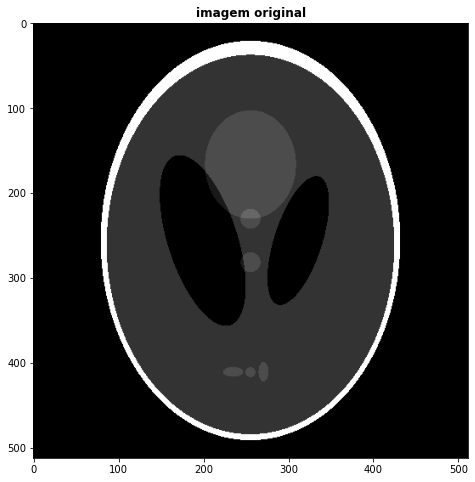

In [4]:
plt.figure(figsize=(8,8))
plt.title('imagem original', fontweight='bold')
plt.imshow(teste, cmap='gray')
plt.show()

In [5]:
from skimage.transform import rotate

def radon_(image, steps): 
    
    #Constroi a Transformada de Radon usando 'steps' projec��es da 'imagem'. 
    height, width = np.shape(image)

    dTheta = 180/steps                                # Incremento do �ngulo das rota��es.
    thetas = np.arange(0,180,dTheta)


    R = np.sqrt(min(image.shape)**2 + max(image.shape)**2)//2
    padded = np.zeros([int(2*R),int(2*R)],dtype=float)
    padded[int(R-height/2):int(R+height/2),int(R-width/2):int(R+width/2)]= image
    
    xx,yy = np.arange(0,padded.shape[0]),np.arange(0,padded.shape[1])
    
    projections = np.zeros((steps,len(xx)))    # Array numpy para acumular projec��es.
    
    
    for j, ang in enumerate(thetas):
        # rotate the image by theta
        rotated = rotate(padded, ang)
        
            
        projections[j,:] = rotated.sum(0)
        
        # c�digo a escrever
    return projections  



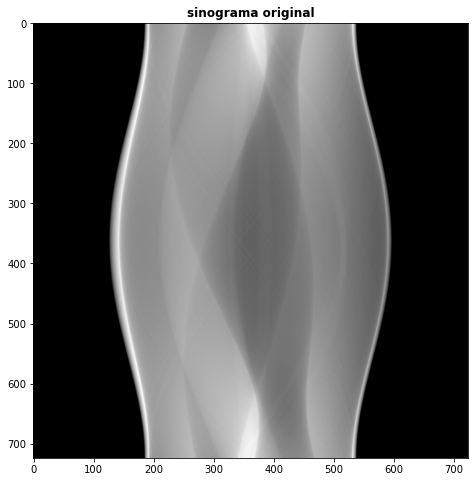

In [6]:
ai = radon_(teste,724)
plt.figure(figsize=(8,8))
plt.title('sinograma original', fontweight='bold')
plt.imshow(ai,cmap='gray')
plt.show()

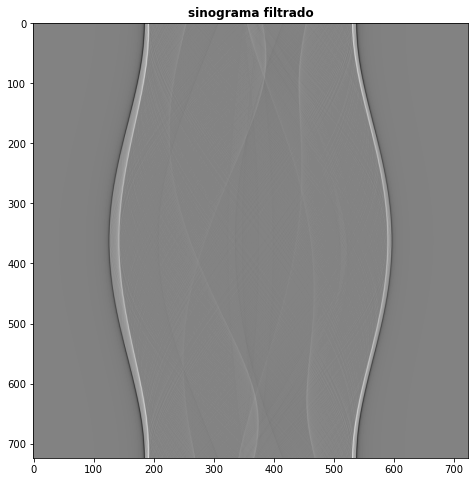

In [7]:
#from scipy.fft import fft, ifft, fftfreq, fftshift
import scipy.fftpack as fft          ## Fast Fourier Transform

"Translate the sinogram to the frequency domain using Fourier Transform"
def fft_translate(projs):
    #Build 1-d FFTs of an array of projections, each projection 1 row of the array.
    return fft.rfft(projs, axis=1)

transformada = fft_translate(ai)

"Filter the projections using a ramp filter"
def ramp_filter(ffts):
    #Ramp filter a 2-d array of 1-d FFTs (1-d FFTs along the rows).
    ramp = np.floor(np.arange(0.5, ffts.shape[1]//2 + 0.1, 0.5))
    return ffts * ramp

filt = ramp_filter(transformada)

"Return to the spatial domain using inverse Fourier Transform"
def inverse_fft_translate(operator):
    return fft.irfft(operator, axis=1)

sin_filt = inverse_fft_translate(filt)

plt.figure(figsize=(8,8))
plt.title('sinograma filtrado', fontweight='bold')
plt.imshow(sin_filt, cmap='gray')
plt.show()

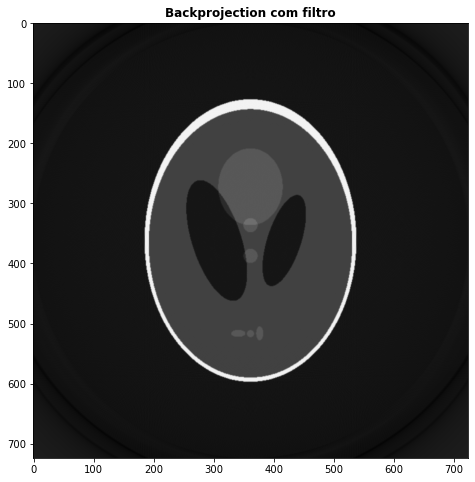

In [10]:
"Reconstruct the image by back projecting the filtered projections (UNFINISHED)"
def back_project(operator):
    laminogram = np.zeros((operator.shape[1],operator.shape[1]))
    dTheta = -180.0 / operator.shape[0] # dTheta negativo pois estamos a tomar os passos contrarios que fizemos no
                                        # sinograma
    for i in range(operator.shape[0]):
        temp = np.tile(operator[i],(operator.shape[1],1))
        temp = rotate(temp, dTheta*i)
        laminogram += temp
    return laminogram

final = back_project(sin_filt)
plt.figure(figsize=(8,8))
plt.title("Backprojection com filtro", fontweight="bold")
plt.imshow(final,cmap='gray')
plt.show()

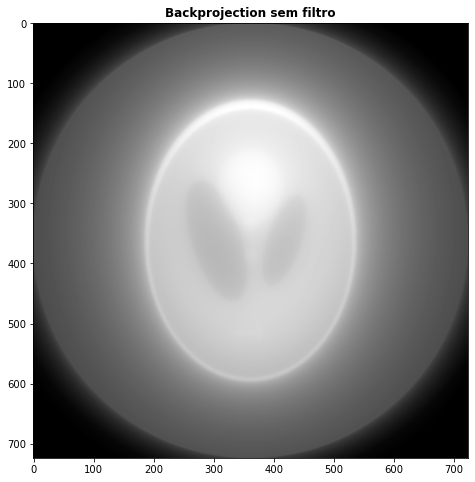

In [9]:
final_ = back_project(ai)

plt.figure(figsize=(8,8))
plt.title("Backprojection sem filtro", fontweight="bold")
plt.imshow(final_,cmap='gray')
plt.show()